In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from numpy import inf,NaN
import json

In [2]:
df = pd.read_csv('weights.csv' , index_col = 0)

In [9]:
with open('section_freq.json') as json_file:
    data = json.load(json_file)

In [4]:
np_tmp = df.to_numpy()

In [5]:
np_tmp += np.transpose(np_tmp)

In [6]:
df_tmp = pd.DataFrame(np_tmp , index = df.index , columns = df.columns)

In [11]:
df_tmp.head()

,"Indian Penal Code, 1860_302","Indian Penal Code, 1860_34",Constitution_14,Constitution_226,Constitution_136,"Indian Penal Code, 1860_304","Indian Penal Code, 1860_149","Indian Penal Code, 1860_120","Indian Penal Code, 1860_307",Constitution_32,...,Constitution_142,"Indian Penal Code, 1860_201","Indian Penal Code, 1860_376",Constitution_309,"Indian Penal Code, 1860_506","Indian Penal Code, 1860_468","Land Acquisition Act, 1894_4","Indian Penal Code, 1860_326","Indian Penal Code, 1860_471","Code of Civil Procedure, 1908_100"
"Indian Penal Code, 1860_302",2455,1125,40,37,148,563,710,329,570,45,...,23,349,114,1,92,20,0,197,23,1
"Indian Penal Code, 1860_34",1125,1490,27,36,98,317,271,226,360,29,...,21,189,80,1,106,49,0,139,44,0
Constitution_14,40,27,1364,295,140,9,14,39,17,242,...,90,13,12,128,12,14,13,12,12,2
Constitution_226,37,36,295,1339,197,15,18,67,27,231,...,89,12,10,47,27,35,27,6,35,5
Constitution_136,148,98,140,197,1134,54,69,75,46,93,...,96,22,47,30,25,28,12,19,28,29


In [12]:
df_tmp.to_csv('full-weights.csv')

In [13]:
dfp = pd.read_csv('full-weights.csv' , index_col = 0 )

In [14]:
dfp.head()

,"Indian Penal Code, 1860_302","Indian Penal Code, 1860_34",Constitution_14,Constitution_226,Constitution_136,"Indian Penal Code, 1860_304","Indian Penal Code, 1860_149","Indian Penal Code, 1860_120","Indian Penal Code, 1860_307",Constitution_32,...,Constitution_142,"Indian Penal Code, 1860_201","Indian Penal Code, 1860_376",Constitution_309,"Indian Penal Code, 1860_506","Indian Penal Code, 1860_468","Land Acquisition Act, 1894_4","Indian Penal Code, 1860_326","Indian Penal Code, 1860_471","Code of Civil Procedure, 1908_100"
"Indian Penal Code, 1860_302",2455,1125,40,37,148,563,710,329,570,45,...,23,349,114,1,92,20,0,197,23,1
"Indian Penal Code, 1860_34",1125,1490,27,36,98,317,271,226,360,29,...,21,189,80,1,106,49,0,139,44,0
Constitution_14,40,27,1364,295,140,9,14,39,17,242,...,90,13,12,128,12,14,13,12,12,2
Constitution_226,37,36,295,1339,197,15,18,67,27,231,...,89,12,10,47,27,35,27,6,35,5
Constitution_136,148,98,140,197,1134,54,69,75,46,93,...,96,22,47,30,25,28,12,19,28,29


In [10]:
for i in df_tmp.index:
    df_tmp[i][i] = data[i]

In [20]:
for section in corr_mat_df.index:
    corr_mat_df[section][section] = data[section]

In [15]:
not_to_drop = ['Indian Penal Code, 1860_302','Indian Penal Code, 1860_420',
               'Indian Penal Code, 1860_498','Indian Penal Code, 1860_201', 
               'Indian Penal Code, 1860_376','Indian Penal Code, 1860_506',
               'Land Acquisition Act, 1894_4', 'Indian Penal Code, 1860_147']

In [16]:
to_drop = [x for x in list(df.index) if x not in not_to_drop]

In [39]:
len(to_drop)

22

In [24]:
dfn = dfp.drop(to_drop, axis = 0)


In [25]:
dfn1 = dfn.drop(to_drop, axis=1)

In [27]:
dfn1.to_csv('weight-8-sections.csv')

In [41]:
corr_mat_df = corr_mat_df.drop(to_drop, axis=0)

In [44]:
corr_mat_df.to_csv('weights-selected.csv')

In [3]:
df.head()

,"Indian Penal Code, 1860_302","Indian Penal Code, 1860_34",Constitution_14,Constitution_226,Constitution_136,"Indian Penal Code, 1860_304","Indian Penal Code, 1860_149","Indian Penal Code, 1860_120","Indian Penal Code, 1860_307",Constitution_32,...,Constitution_142,"Indian Penal Code, 1860_201","Indian Penal Code, 1860_376",Constitution_309,"Indian Penal Code, 1860_506","Indian Penal Code, 1860_468","Land Acquisition Act, 1894_4","Indian Penal Code, 1860_326","Indian Penal Code, 1860_471","Code of Civil Procedure, 1908_100"
"Indian Penal Code, 1860_302",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Indian Penal Code, 1860_34",1125,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Constitution_14,40,27,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Constitution_226,37,36,295,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Constitution_136,148,98,140,197,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
for i in df.index:
    df[i] = df[i].astype(float)

In [124]:
df[df<35] = 0

In [102]:
df.to_csv('weight_norm.csv')

In [125]:
for i in df.index:
    for j in df.index:
        #print(df[i][j],min(data[i],data[j]))
        df[i][j] = float(df[i][j])/min(data[i],data[j])

In [109]:
df[df<1] = 0

In [127]:
adj_mat1 = df.to_numpy()

In [128]:
adj_mat1 = adj_mat1 + np.transpose(adj_mat1)

In [129]:
dist_mat1 = 1/adj_mat1

C:\Users\Vks\AppData\Local\Temp/ipykernel_388/202588958.py:1: RuntimeWarning: divide by zero encountered in true_divide
  dist_mat1 = 1/adj_mat1


In [130]:
dist_mat1[ dist_mat1 == inf] = 1000

In [137]:
find_cluster_name_2(5)

[['Constitution_136', 'Constitution_142'],
 ['Constitution_32', 'Constitution_21', 'Constitution_19'],
 ['Constitution_14', 'Constitution_16', 'Constitution_309'],
 ['Indian Penal Code, 1860_302',
  'Indian Penal Code, 1860_34',
  'Indian Penal Code, 1860_149',
  'Indian Penal Code, 1860_307',
  'Indian Penal Code, 1860_148',
  'Indian Penal Code, 1860_147',
  'Indian Penal Code, 1860_324',
  'Indian Penal Code, 1860_326'],
 ['Indian Penal Code, 1860_304', 'Indian Penal Code, 1860_498'],
 ['Indian Penal Code, 1860_120',
  'Indian Penal Code, 1860_420',
  'Indian Penal Code, 1860_468',
  'Indian Penal Code, 1860_471'],
 ['Indian Penal Code, 1860_323', 'Indian Penal Code, 1860_506'],
 ['Indian Penal Code, 1860_376'],
 ['Code of Civil Procedure, 1908_100'],
 ['Land Acquisition Act, 1894_4'],
 ['Constitution_226', 'Constitution_227'],
 ['Indian Penal Code, 1860_201']]

In [131]:
def find_cluster_name_2(th):
    #dist_mat[ dist_mat > 1/n] = 2
    sc = AgglomerativeClustering(n_clusters=None, 
                                 affinity='precomputed', 
                                 linkage='complete', 
                                 compute_full_tree = True,
                                 distance_threshold=th, 
                                 compute_distances=False)

    temp1 = sc.fit_predict(dist_mat1)
    temp1 = temp1.tolist()
    tmp_set = set(temp1)
    cluster_name = [[] for x in range(len(tmp_set))]
    k = 0
    for i in temp1:
        cluster_name[i].append(df.index[k])
        k += 1
    return(cluster_name)

In [21]:
with open('section_freq.json') as json_file:
    data = json.load(json_file)

In [104]:
adj_mat = adj_mat + np.transpose(adj_mat)

In [109]:
for i in range(30):
    dist_mat[i][i] = 1.0

In [13]:
dist_mat = 1/adj_mat
dist_mat[dist_mat == inf] = 2

C:\Users\Vks\AppData\Local\Temp/ipykernel_2240/1799764206.py:1: RuntimeWarning: divide by zero encountered in true_divide
  dist_mat = 1/adj_mat


In [110]:
dist_mat

array([[1.00000000e+00, 8.88888889e-04, 2.50000000e-02, 2.70270270e-02,
        6.75675676e-03, 1.77619893e-03, 1.40845070e-03, 3.03951368e-03,
        1.75438596e-03, 2.22222222e-02, 1.72711572e-03, 1.12359551e-02,
        2.98507463e-03, 5.00000000e-01, 2.53164557e-03, 6.66666667e-02,
        4.54545455e-02, 2.97619048e-03, 6.28930818e-03, 3.44827586e-02,
        4.34782609e-02, 2.86532951e-03, 8.77192982e-03, 1.00000000e+00,
        1.08695652e-02, 5.00000000e-02, 2.00000000e+00, 5.07614213e-03,
        4.34782609e-02, 1.00000000e+00],
       [8.88888889e-04, 1.00000000e+00, 3.70370370e-02, 2.77777778e-02,
        1.02040816e-02, 3.15457413e-03, 3.69003690e-03, 4.42477876e-03,
        2.77777778e-03, 3.44827586e-02, 4.58715596e-03, 1.56250000e-02,
        4.36681223e-03, 5.00000000e-01, 6.89655172e-03, 7.14285714e-02,
        6.25000000e-02, 4.58715596e-03, 6.75675676e-03, 1.12359551e-02,
        4.76190476e-02, 5.29100529e-03, 1.25000000e-02, 1.00000000e+00,
        9.43396226e-03,

In [18]:
sc = AgglomerativeClustering(n_clusters=5, 
                                 affinity='euclidean', 
                                 linkage='complete', 
                                 distance_threshold=None, 
                                 compute_distances=False)

sc.fit_predict(dist_mat)

array([1, 1, 4, 4, 4, 2, 1, 1, 1, 4, 1, 4, 2, 0, 1, 4, 2, 1, 2, 1, 4, 1,
       1, 3, 1, 1, 0, 1, 1, 0], dtype=int64)

In [22]:
for i in range(25,51):
    x = (adj_mat < i).sum() - 465
    print(i,x)

25 65
26 71
27 75
28 87
29 95
30 103
31 105
32 111
33 117
34 125
35 131
36 135
37 141
38 145
39 151
40 153
41 155
42 159
43 163
44 169
45 173
46 179
47 187
48 193
49 193
50 199


In [15]:
def find_cluster_name(n,n_c):
    adj_mat[ adj_mat > 1/n] = 2
    sc = AgglomerativeClustering(n_clusters=n_c, 
                                 affinity='euclidean', 
                                 linkage='complete', 
                                 distance_threshold=None, 
                                 compute_distances=False)

    temp1 = sc.fit_predict(adj_mat)
    temp1 = temp1.tolist()
    cluster_name = [[] for x in range(n_c)]
    k = 0
    for i in temp1:
        cluster_name[i].append(df.index[k])
        k += 1
    return(cluster_name)

In [67]:
df.index[2:5]

Index(['Constitution_14', 'Constitution_226', 'Constitution_136'], dtype='object')

In [68]:
find_cluster_name(25,9)

C:\Users\Vks\Anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:493: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


[['Constitution_227',
  'Indian Penal Code, 1860_498',
  'Indian Penal Code, 1860_420',
  'Constitution_142',
  'Indian Penal Code, 1860_201',
  'Indian Penal Code, 1860_376',
  'Constitution_309',
  'Indian Penal Code, 1860_506',
  'Indian Penal Code, 1860_468',
  'Land Acquisition Act, 1894_4',
  'Indian Penal Code, 1860_326',
  'Indian Penal Code, 1860_471',
  'Code of Civil Procedure, 1908_100'],
 ['Indian Penal Code, 1860_304',
  'Indian Penal Code, 1860_307',
  'Indian Penal Code, 1860_323',
  'Indian Penal Code, 1860_147',
  'Indian Penal Code, 1860_324'],
 ['Indian Penal Code, 1860_149'],
 ['Indian Penal Code, 1860_148'],
 ['Constitution_226',
  'Constitution_136',
  'Constitution_32',
  'Constitution_21',
  'Constitution_16',
  'Constitution_19'],
 ['Indian Penal Code, 1860_34'],
 ['Constitution_14'],
 ['Indian Penal Code, 1860_302'],
 ['Indian Penal Code, 1860_120']]

In [156]:
file = open('cluster_form_2.txt' , 'w')

n_c_lst = [x for x in range(8,11)]
n_lst = [75,100,150,200]

for l in n_c_lst:
    print("Number of clusters = " + str(l) + "\n\n")
    for m in n_lst:
        print("Threshold frequency = " + str(m) + "\n")
        temp_lst1 = find_cluster_name(m,l)
        print(*temp_lst1 , sep ="\n")
        print("\n\n")

Number of clusters = 8


Threshold frequency = 75

['Indian Penal Code, 1860_302', 'Indian Penal Code, 1860_34', 'Indian Penal Code, 1860_149', 'Indian Penal Code, 1860_120', 'Indian Penal Code, 1860_307', 'Indian Penal Code, 1860_148', 'Indian Penal Code, 1860_147', 'Indian Penal Code, 1860_324', 'Indian Penal Code, 1860_420', 'Indian Penal Code, 1860_201', 'Indian Penal Code, 1860_376', 'Indian Penal Code, 1860_506', 'Indian Penal Code, 1860_468', 'Indian Penal Code, 1860_326', 'Indian Penal Code, 1860_471']
['Constitution_14', 'Constitution_226', 'Constitution_136', 'Constitution_32', 'Constitution_21', 'Constitution_227', 'Constitution_142']
['Indian Penal Code, 1860_304', 'Indian Penal Code, 1860_323', 'Indian Penal Code, 1860_498']
['Code of Civil Procedure, 1908_100']
['Land Acquisition Act, 1894_4']
['Constitution_309']
['Constitution_16']
['Constitution_19']



Threshold frequency = 100

['Indian Penal Code, 1860_302', 'Indian Penal Code, 1860_34', 'Indian Penal Code, 1860_149

n_c = 6 , n = 0

array([3, 5, 0, 0, 0, 1, 2, 1, 1, 0, 4, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

n_c = 6 , n = 25

array([3, 5, 4, 0, 0, 1, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

n_c = 8 , n = 0

array([7, 5, 6, 3, 3, 0, 2, 0, 0, 3, 4, 3, 0, 3, 0, 1, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] 

In [18]:
file.close()

C:\Users\Vks\AppData\Local\Temp/ipykernel_4644/1971597916.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Dendrogram = shc.dendrogram((shc.linkage(adj_mat, method ='complete')))


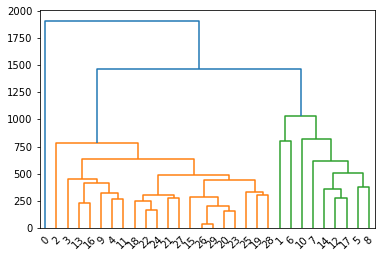

In [7]:
Dendrogram = shc.dendrogram((shc.linkage(adj_mat, method ='complete')))

In [13]:
#Parameter 1, min no of connections
n = 25
adj_mat[ adj_mat < n] = 0

In [37]:
a = [1,2,3]
print(a.index(3))

2


In [35]:
a[2]

IndexError: list index out of range

C:\Users\Vks\Anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:493: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([3, 5, 0, 0, 0, 1, 2, 1, 1, 0, 4, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [18]:
df

,"Indian Penal Code, 1860_302","Indian Penal Code, 1860_34",Constitution_14,Constitution_226,Constitution_136,"Indian Penal Code, 1860_304","Indian Penal Code, 1860_149","Indian Penal Code, 1860_120","Indian Penal Code, 1860_307",Constitution_32,...,Constitution_142,"Indian Penal Code, 1860_201","Indian Penal Code, 1860_376",Constitution_309,"Indian Penal Code, 1860_506","Indian Penal Code, 1860_468","Land Acquisition Act, 1894_4","Indian Penal Code, 1860_326","Indian Penal Code, 1860_471","Code of Civil Procedure, 1908_100"
"Indian Penal Code, 1860_302",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Indian Penal Code, 1860_34",1125,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Constitution_14,40,27,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Constitution_226,37,36,295,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Constitution_136,148,98,140,197,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Indian Penal Code, 1860_304",563,317,9,15,54,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Indian Penal Code, 1860_149",710,271,14,18,69,172,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Indian Penal Code, 1860_120",329,226,39,67,75,42,113,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Indian Penal Code, 1860_307",570,360,17,27,46,143,298,128,0,0,...,0,0,0,0,0,0,0,0,0,0
Constitution_32,45,29,242,231,93,12,19,52,14,0,...,0,0,0,0,0,0,0,0,0,0


C:\Users\Vks\AppData\Local\Temp/ipykernel_4644/1971597916.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Dendrogram = shc.dendrogram((shc.linkage(adj_mat, method ='complete')))


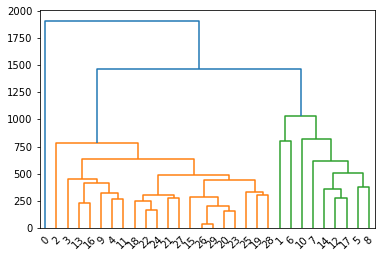

In [ ]:
#Q. How many documents are not shared with the remaining 29 sections, for each section?

In [87]:
df2 = pd.read_csv('weight_norm.csv' , index_col = 0)

In [88]:
df2.head()

,"Indian Penal Code, 1860_302","Indian Penal Code, 1860_34",Constitution_14,Constitution_226,Constitution_136,"Indian Penal Code, 1860_304","Indian Penal Code, 1860_149","Indian Penal Code, 1860_120","Indian Penal Code, 1860_307",Constitution_32,...,Constitution_142,"Indian Penal Code, 1860_201","Indian Penal Code, 1860_376",Constitution_309,"Indian Penal Code, 1860_506","Indian Penal Code, 1860_468","Land Acquisition Act, 1894_4","Indian Penal Code, 1860_326","Indian Penal Code, 1860_471","Code of Civil Procedure, 1908_100"
"Indian Penal Code, 1860_302",1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Indian Penal Code, 1860_34",0.755034,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Constitution_14,0.029326,0.019795,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Constitution_226,0.027633,0.026886,0.220314,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Constitution_136,0.130511,0.086420,0.123457,0.173721,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
adj_mat = df2.to_numpy()

In [90]:
adj_mat = adj_mat + np.transpose(adj_mat)

In [91]:
adj_mat

array([[2.00000000e+00, 7.55033557e-01, 2.93255132e-02, 2.76325616e-02,
        1.30511464e-01, 6.64698937e-01, 8.84184309e-01, 4.23423423e-01,
        7.61014686e-01, 6.38297872e-02, 8.73303167e-01, 1.35464231e-01,
        6.58153242e-01, 3.98406375e-03, 8.19502075e-01, 3.28227571e-02,
        4.85651214e-02, 7.48329621e-01, 3.56502242e-01, 6.57596372e-02,
        5.45023697e-02, 8.66004963e-01, 2.98429319e-01, 3.07692308e-03,
        3.30935252e-01, 7.43494424e-02, 0.00000000e+00, 7.57692308e-01,
        9.01960784e-02, 3.93700787e-03],
       [7.55033557e-01, 2.00000000e+00, 1.97947214e-02, 2.68857356e-02,
        8.64197531e-02, 3.74262102e-01, 3.37484433e-01, 2.90862291e-01,
        4.80640854e-01, 4.11347518e-02, 3.28808446e-01, 9.74124810e-02,
        4.49901768e-01, 3.98406375e-03, 3.00829876e-01, 3.06345733e-02,
        3.53200883e-02, 4.85523385e-01, 3.31838565e-01, 2.01814059e-01,
        4.97630332e-02, 4.68982630e-01, 2.09424084e-01, 3.07692308e-03,
        3.81294964e-01,

In [26]:
dist_mat = 1./adj_mat

C:\Users\Vks\AppData\Local\Temp/ipykernel_388/2763701707.py:1: RuntimeWarning: divide by zero encountered in true_divide
  dist_mat = 1./adj_mat


In [35]:
dist_mat[ dist_mat == inf] = 1000

In [36]:
dist_mat

array([[   1.        ,    1.32444444,   34.1       ,   36.18918919,
           7.66216216,    1.5044405 ,    1.13098592,    2.36170213,
           1.31403509,   15.66666667,    1.14507772,    7.38202247,
           1.51940299,  251.        ,    1.22025316,   30.46666667,
          20.59090909,    1.33630952,    2.80503145,   15.20689655,
          18.34782609,    1.15472779,    3.35087719,  325.        ,
           3.02173913,   13.45      , 1000.        ,    1.31979695,
          11.08695652,  254.        ],
       [   1.32444444,    1.        ,   50.51851852,   37.19444444,
          11.57142857,    2.67192429,    2.96309963,    3.4380531 ,
           2.08055556,   24.31034483,    3.0412844 ,   10.265625  ,
           2.22270742,  251.        ,    3.32413793,   32.64285714,
          28.3125    ,    2.05963303,    3.01351351,    4.95505618,
          20.0952381 ,    2.13227513,    4.775     ,  325.        ,
           2.62264151,    5.48979592, 1000.        ,    1.8705036 ,
         

In [39]:
from matplotlib.pyplot import hist

In [42]:
flat = np.array(dist_mat.flat)

In [73]:
flat2 = flat.copy()

In [75]:
flat2 = list(filter(lambda x: x < 1000 , flat2))

In [78]:
from statistics import mean,stdev

In [79]:
print(mean(flat2),stdev(flat2))

40.14597380340055 75.35687496290447


(array([316., 138.,  92.,  66.,  48.,  34.,  16.,   4.,   4.,   2.,   0.,
          4.,  10.,   6.,   0.,   0.,  10.,   0.,   0.,   0.,   0.,   2.,
          0.,   0.,   6.,  14.,   4.,   0.,   0.,   0.,   0.,   0.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   8.]),
 array([  1.  ,  11.02,  21.04,  31.06,  41.08,  51.1 ,  61.12,  71.14,
         81.16,  91.18, 101.2 , 111.22, 121.24, 131.26, 141.28, 151.3 ,
        161.32, 171.34, 181.36, 191.38, 201.4 , 211.42, 221.44, 231.46,
        241.48, 251.5 , 261.52, 271.54, 281.56, 291.58, 301.6 , 311.62,
        321.64, 331.66, 341.68, 351.7 , 361.72, 371.74, 381.76, 391.78,
        401.8 , 411.82, 421.84, 431.86, 441.88, 451.9 , 461.92, 471.94,
        481.96, 491.98, 502.  ]),
 <BarContainer object of 50 artists>)

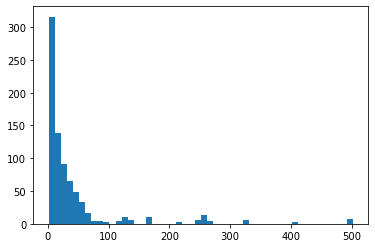

In [80]:
hist(flat2, bins = 50)

In [68]:
def find_cluster_name_1(th):
    #dist_mat[ dist_mat > 1/n] = 2
    sc = AgglomerativeClustering(n_clusters=None, 
                                 affinity='precomputed', 
                                 linkage='complete', 
                                 compute_full_tree = True,
                                 distance_threshold=th, 
                                 compute_distances=False)

    temp1 = sc.fit_predict(dist_mat)
    temp1 = temp1.tolist()
    tmp_set = set(temp1)
    cluster_name = [[] for x in range(len(tmp_set))]
    k = 0
    for i in temp1:
        cluster_name[i].append(df2.index[k])
        k += 1
    return(cluster_name)

In [59]:
th = 100
sc = AgglomerativeClustering(n_clusters=None, 
                                 affinity='euclidean', 
                                 linkage='complete', 
                                 compute_full_tree = True,
                                 distance_threshold=th, 
                                 compute_distances=False)
sc.fit_predict(dist_mat)

array([13, 18, 19,  0,  0, 21, 20, 15,  1, 26,  1, 23, 25,  9, 12, 17, 16,
       22, 10,  7, 24, 11,  2,  5,  8,  4, 14,  2,  6,  3], dtype=int64)

In [86]:
find_cluster_name_1(1./0.2)

[['Constitution_136', 'Constitution_142'],
 ['Constitution_32', 'Constitution_21', 'Constitution_19'],
 ['Indian Penal Code, 1860_302',
  'Indian Penal Code, 1860_34',
  'Indian Penal Code, 1860_149',
  'Indian Penal Code, 1860_307',
  'Indian Penal Code, 1860_148',
  'Indian Penal Code, 1860_147',
  'Indian Penal Code, 1860_324',
  'Indian Penal Code, 1860_326'],
 ['Constitution_226', 'Constitution_227'],
 ['Constitution_14', 'Constitution_16', 'Constitution_309'],
 ['Indian Penal Code, 1860_323', 'Indian Penal Code, 1860_506'],
 ['Indian Penal Code, 1860_120',
  'Indian Penal Code, 1860_420',
  'Indian Penal Code, 1860_468',
  'Indian Penal Code, 1860_471'],
 ['Indian Penal Code, 1860_376'],
 ['Land Acquisition Act, 1894_4'],
 ['Code of Civil Procedure, 1908_100'],
 ['Indian Penal Code, 1860_201'],
 ['Indian Penal Code, 1860_304', 'Indian Penal Code, 1860_498']]

In [154]:
for l in [8,9,10]:
    print("Number of clusters = " + str(l) + "\n\n")
    temp_lst1 = find_cluster_name_1(0.75,l)
    print(*temp_lst1 , sep ="\n")
    print("\n\n")

Number of clusters = 8


['Indian Penal Code, 1860_302', 'Indian Penal Code, 1860_34', 'Indian Penal Code, 1860_149', 'Indian Penal Code, 1860_120', 'Indian Penal Code, 1860_307', 'Indian Penal Code, 1860_148', 'Indian Penal Code, 1860_147', 'Indian Penal Code, 1860_324', 'Indian Penal Code, 1860_420', 'Indian Penal Code, 1860_201', 'Indian Penal Code, 1860_376', 'Indian Penal Code, 1860_506', 'Indian Penal Code, 1860_468', 'Indian Penal Code, 1860_326', 'Indian Penal Code, 1860_471']
['Constitution_14', 'Constitution_226', 'Constitution_136', 'Constitution_32', 'Constitution_21', 'Constitution_227', 'Constitution_142']
['Indian Penal Code, 1860_304', 'Indian Penal Code, 1860_323', 'Indian Penal Code, 1860_498']
['Code of Civil Procedure, 1908_100']
['Land Acquisition Act, 1894_4']
['Constitution_309']
['Constitution_16']
['Constitution_19']



Number of clusters = 9


['Indian Penal Code, 1860_304', 'Indian Penal Code, 1860_323', 'Indian Penal Code, 1860_498']
['Constitution_14', 'Con

In [31]:
df2

,"Indian Penal Code, 1860_302","Indian Penal Code, 1860_34",Constitution_14,Constitution_226,Constitution_136,"Indian Penal Code, 1860_304","Indian Penal Code, 1860_149","Indian Penal Code, 1860_120","Indian Penal Code, 1860_307",Constitution_32,...,Constitution_142,"Indian Penal Code, 1860_201","Indian Penal Code, 1860_376",Constitution_309,"Indian Penal Code, 1860_506","Indian Penal Code, 1860_468","Land Acquisition Act, 1894_4","Indian Penal Code, 1860_326","Indian Penal Code, 1860_471","Code of Civil Procedure, 1908_100"
"Indian Penal Code, 1860_302",1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
"Indian Penal Code, 1860_34",0.755034,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
Constitution_14,0.029326,0.019795,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
Constitution_226,0.027633,0.026886,0.220314,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
Constitution_136,0.130511,0.086420,0.123457,0.173721,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
"Indian Penal Code, 1860_304",0.664699,0.374262,0.010626,0.017710,0.063754,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
"Indian Penal Code, 1860_149",0.884184,0.337484,0.017435,0.022416,0.085928,0.214197,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
"Indian Penal Code, 1860_120",0.423423,0.290862,0.050193,0.086229,0.096525,0.054054,0.145431,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
"Indian Penal Code, 1860_307",0.761015,0.480641,0.022697,0.036048,0.061415,0.190921,0.397864,0.170895,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
Constitution_32,0.063830,0.041135,0.343262,0.327660,0.131915,0.017021,0.026950,0.073759,0.019858,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
